In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler
import numpy as np
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/نسخة من student-mat.csv',sep=';')
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [ ]:
# Encode categorical features
data_encoded = pd.get_dummies(data, drop_first=True)
data_encoded['G3'] = data_encoded['G3'].apply(lambda x: 1 if x >= 10 else 0)
y = data_encoded['G3']
data_encoded.drop('G3',axis=1,inplace=True)
# Scale numerical features
scaler = StandardScaler()
numerical_features = data_encoded.select_dtypes(include='number').columns
data_encoded[numerical_features] = scaler.fit_transform(data_encoded[numerical_features])
data_encoded = data_encoded.applymap(lambda x: 1 if x is True else 0 if x is False else x)

data_encoded['G3'] = y



y.value_counts()


<ipython-input-6-b19655e6b3c0>:10: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data_encoded = data_encoded.applymap(lambda x: 1 if x is True else 0 if x is False else x)


,count
G3,
1,265
0,130


In [ ]:
train_data=data_encoded.sample(frac=0.8,random_state=0)
test_data=data_encoded.drop(train_data.index)
train_data

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes,G3
329,0.238380,1.143856,1.360371,0.792251,1.150779,-0.449944,0.062194,-0.236010,-0.097908,-0.540699,...,0,0,1,1,0,0,1,1,1,1
318,0.238380,0.229234,1.360371,-0.643249,1.150779,-0.449944,0.062194,-0.236010,0.801479,0.583385,...,0,0,1,1,1,0,1,1,0,1
317,1.023046,1.143856,0.440257,-0.643249,1.150779,-0.449944,0.062194,-0.236010,0.801479,-0.540699,...,0,0,1,1,1,1,1,1,1,0
65,-0.546287,1.143856,0.440257,2.227751,-0.042286,-0.449944,1.178860,0.766399,-0.097908,-0.540699,...,0,0,1,0,1,1,1,1,0,1
59,-0.546287,1.143856,-0.479857,-0.643249,-0.042286,-0.449944,0.062194,-1.238419,-0.097908,-0.540699,...,0,0,1,0,0,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,1.023046,1.143856,0.440257,0.792251,-1.235351,-0.449944,0.062194,-1.238419,-0.097908,-0.540699,...,0,0,0,1,1,1,1,1,0,1
227,0.238380,-0.685387,0.440257,-0.643249,-0.042286,-0.449944,1.178860,-0.236010,-0.097908,-0.540699,...,0,0,1,1,0,0,1,1,0,1
148,-0.546287,1.143856,1.360371,-0.643249,-1.235351,-0.449944,-1.054472,-0.236010,-0.997295,0.583385,...,0,0,1,0,0,1,0,1,1,0
143,-0.546287,-1.600009,-1.399970,-0.643249,-1.235351,-0.449944,-1.054472,0.766399,0.801479,1.707469,...,0,0,0,0,0,1,1,1,0,1


In [ ]:
X_train, X_val, y_train, y_val = train_test_split(train_data.drop('G3',axis=1), train_data['G3'], test_size=0.15, shuffle=True, random_state=1) #random state for reproducing the same result every run
train = pd.concat([X_train,y_train],axis=1)
val = pd.concat([X_val,y_val],axis=1)
train

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes,G3
109,-0.546287,1.143856,1.360371,-0.643249,1.150779,-0.449944,1.178860,0.766399,1.700867,-0.540699,...,0,0,1,1,1,1,1,1,1,1
93,-0.546287,1.143856,-0.479857,0.792251,-0.042286,-0.449944,1.178860,-0.236010,-0.097908,-0.540699,...,0,0,1,1,1,1,1,1,0,1
228,1.023046,-0.685387,-1.399970,3.663251,-0.042286,-0.449944,0.062194,-0.236010,-0.997295,2.831553,...,0,1,1,1,1,1,1,1,1,0
139,-1.330954,1.143856,1.360371,0.792251,-1.235351,-0.449944,0.062194,-0.236010,-0.997295,-0.540699,...,0,0,0,0,1,1,1,1,0,1
298,1.023046,1.143856,0.440257,-0.643249,2.343844,-0.449944,0.062194,-0.236010,-0.097908,-0.540699,...,0,0,1,1,0,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44,-0.546287,-0.685387,-0.479857,0.792251,-0.042286,0.896479,0.062194,-0.236010,-0.097908,0.583385,...,0,1,0,0,1,1,1,1,0,0
315,1.807713,-0.685387,0.440257,-0.643249,1.150779,0.896479,0.062194,-2.240828,-0.997295,-0.540699,...,1,0,0,0,0,1,1,1,1,1
100,-0.546287,1.143856,1.360371,-0.643249,-1.235351,-0.449944,0.062194,1.768808,1.700867,3.955638,...,0,1,1,1,1,1,1,1,0,0
110,-1.330954,1.143856,1.360371,-0.643249,-1.235351,-0.449944,1.178860,1.768808,-0.097908,-0.540699,...,0,0,0,0,1,1,1,1,0,1


In [ ]:
tf.random.set_seed(1234)  # applied to achieve consistent results
N_N_model = Sequential(
    [
        tf.keras.Input(shape=(42,),name = 'input_layer'),
        tf.keras.layers.BatchNormalization(name = 'bn1'),
        tf.keras.layers.Dropout(rate=0.01, name = 'dropout1'),
        tf.keras.layers.Dense(16, activation='sigmoid', name = 'hidden_layer'),
        tf.keras.layers.Dense(1, activation='sigmoid', name = 'output_layer')
     ]
)
N_N_model.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ bn1 (BatchNormalization)             │ (None, 41)                  │             164 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout1 (Dropout)                   │ (None, 41)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hidden_layer (Dense)                 │ (None, 16)                  │             672 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 853 (3.33 KB)

 Trainable params: 771 (3.01 KB)

 Non-trainable params: 82 (328.00 B)

In [ ]:
N_N_model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
)

In [ ]:
pd.Series(y_train).value_counts()

,count
1,185
0,91


In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_val = encoder.transform(y_val)

In [ ]:
# Compute class weights dynamically
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

unique_classes = np.unique(y_train)
class_weights = dict(zip(unique_classes, compute_class_weight('balanced', classes=unique_classes, y=y_train)))

# Model checkpoint
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='/content/drive/MyDrive/Colab Notebooks/best_model.keras',
    monitor="val_loss",
    save_best_only=True,
    mode="min",
    save_freq="epoch"
)

# Early stopping
early_stopping_callback = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=20,
    mode="min"
)

# Fit the model
N_N_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=500,
    class_weight=class_weights,
    batch_size=8,
    callbacks=[checkpoint_callback, early_stopping_callback]
)



Epoch 1/500
35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.7977 - val_loss: 0.5990
Epoch 2/500
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.6974 - val_loss: 0.5680
Epoch 3/500
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6328 - val_loss: 0.5465
Epoch 4/500
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5890 - val_loss: 0.5287
Epoch 5/500
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5528 - val_loss: 0.5109
Epoch 6/500
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5276 - val_loss: 0.4927
Epoch 7/500
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4982 - val_loss: 0.4733
Epoch 8/500
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4754 - val_loss: 0.4535
Epoch 9/500
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4496 - val_loss: 0.4345
Epoch 10/500
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4281 - val_loss: 0.4168
Epoch 11/500
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4086 - val_loss: 0.4008
Epoch 12/500
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.

In [ ]:
N_N_model = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/best_model.keras')

In [ ]:
import itertools
def plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=None, normalize=True):

    accuracy = np.trace(cm) / np.sum(cm).astype('float')
    misclass = 1 - accuracy
    sensetivity = cm[1,1] / (cm[1,1] + cm[1,0])
    specificity = cm[0,0] / (cm[0,0] + cm[0,1])
    precision = cm[1,1] / (cm[1,1] + cm[0,1])



    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}; sensetivity = {:0.4f}; spicifisity = {:0.4f}; precision = {:0.4f}'.format(accuracy, misclass,sensetivity,specificity,precision))
    plt.show()

In [ ]:
y_train

array([0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0])

In [ ]:
y_pred = N_N_model.predict(X_train)
y_pred = [1 if p > 0.5 else 0 for p in y_pred]
y_pred

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


[0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,


In [ ]:
pd.Series(y_train).value_counts()

,count
1,185
0,91


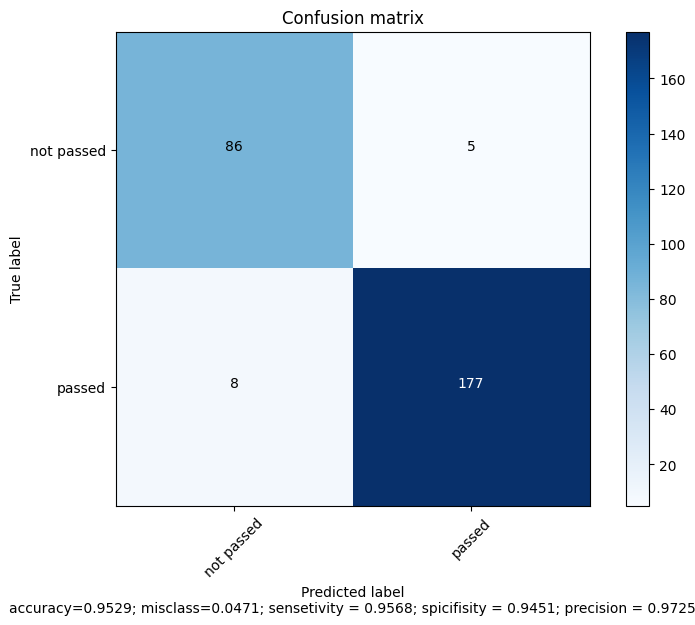

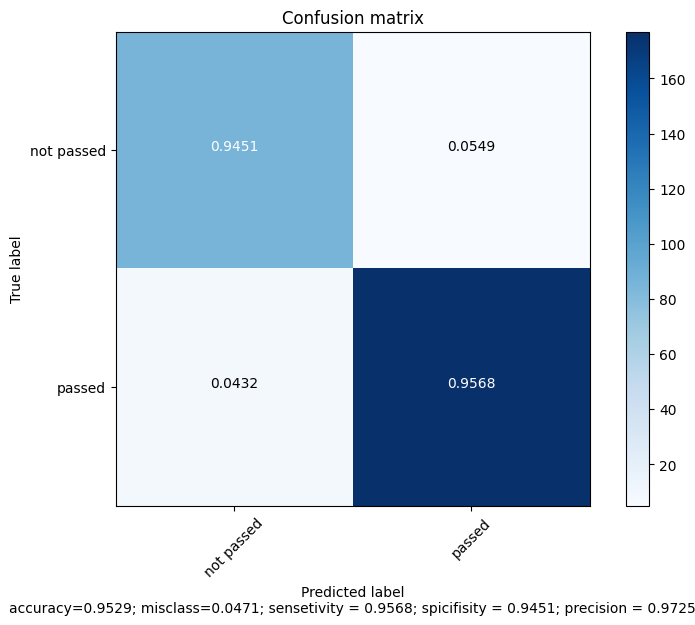

In [ ]:
target_names = ['not passed','passed']

cm = confusion_matrix(y_train, y_pred)
plot_confusion_matrix(cm,
                          target_names=target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=False)
plot_confusion_matrix(cm,
                          target_names=target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True)

target_names = ['not passed','passed']

cm = confusion_matrix(y_test, y_pred_test)
plot_confusion_matrix(cm,
                          target_names=target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=False)
plot_confusion_matrix(cm,
                          target_names=target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True)

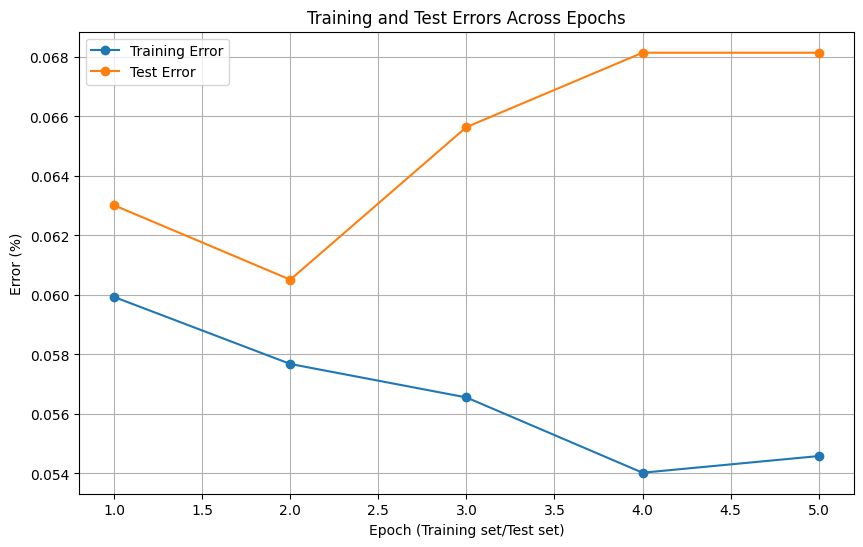

In [ ]:
from sklearn.model_selection import KFold
from tensorflow.keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt

data_encoded
X = data_encoded.drop('G3', axis=1)
y = data_encoded['G3']

# Initialize 10-fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# To store errors across folds
all_train_errors = []
all_test_errors = []

# 10-fold cross-validation
for train_idx, test_idx in kf.split(X):
    # Split into train/test sets
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]


    N_N_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # To track errors for this fold
    train_errors = []
    test_errors = []

    # Train for 5 epochs
    for epoch in range(5):
        N_N_model.fit(X_train, y_train, epochs=1, batch_size=8, verbose=0)  # Train 1 epoch at a time

        # Calculate errors
        train_error = 1 - N_N_model.evaluate(X_train, y_train, verbose=0)[1]  # Accuracy to error
        test_error = 1 - N_N_model.evaluate(X_test, y_test, verbose=0)[1]

        train_errors.append(train_error)
        test_errors.append(test_error)

    # Append fold errors
    all_train_errors.append(train_errors)
    all_test_errors.append(test_errors)

# Average errors across folds
avg_train_errors = np.mean(all_train_errors, axis=0)
avg_test_errors = np.mean(all_test_errors, axis=0)

# Plot the errors
plt.figure(figsize=(10, 6))
plt.plot(range(1, 6), avg_train_errors, label='Training Error', marker='o')
plt.plot(range(1, 6), avg_test_errors, label='Test Error', marker='o')
plt.xlabel("Epoch (Training set/Test set)")
plt.ylabel("Error (%)")
plt.title("Training and Test Errors Across Epochs")
plt.legend()
plt.grid(True)
plt.show()

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


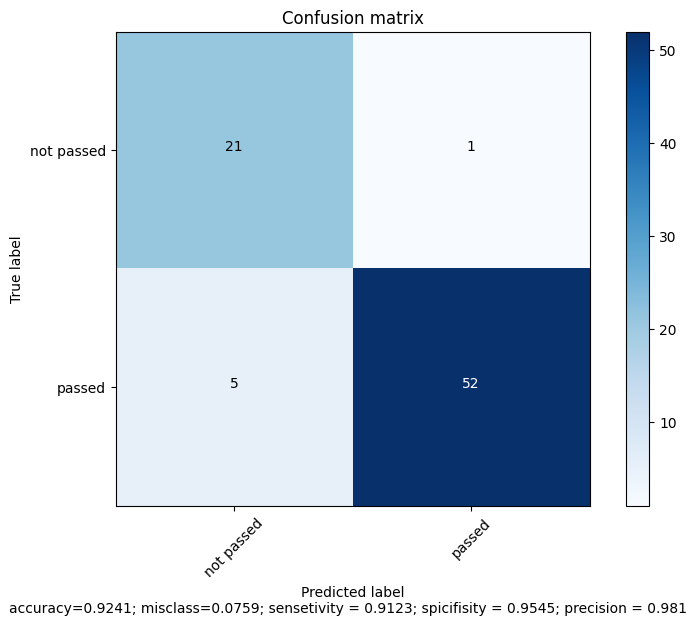

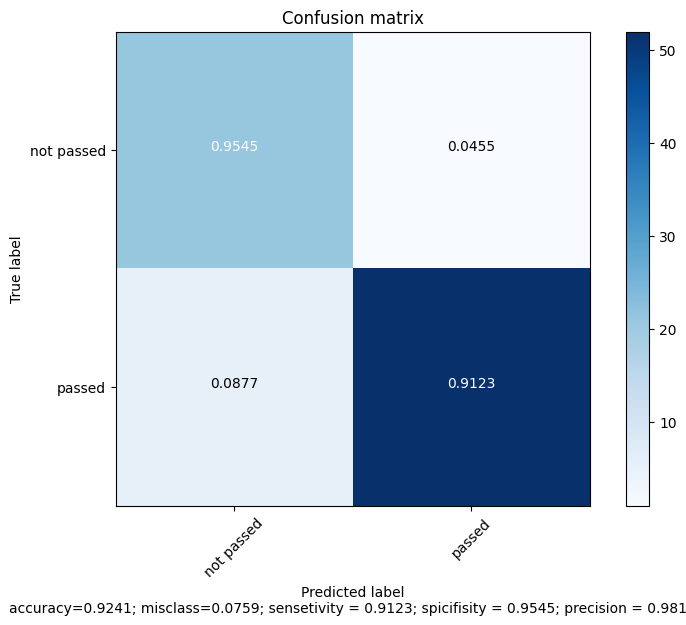

In [ ]:
y_pred_test = N_N_model.predict(test_data.drop('G3',axis=1))
y_pred_test = [1 if p > 0.5 else 0 for p in y_pred]

y_test=test_data['G3']


# Ensure y_pred_test matches the size of y_test
y_pred_test = model.predict(test_data.drop('G3',axis=1))
if len(y_test) != len(y_pred_test):
    raise ValueError(f"Inconsistent sizes: y_test={len(y_test)}, y_pred_test={len(y_pred_test)}")

# Convert predictions to binary (for binary classification)
y_pred_test_binary = (y_pred_test > 0.5).astype(int)

target_names = ['not passed','passed']

cm = confusion_matrix(y_test, y_pred_test_binary)
plot_confusion_matrix(cm,
                          target_names=target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=False)
plot_confusion_matrix(cm,
                          target_names=target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True)




In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
# Create an SVM classifier with a polynomial kernel
svm_model = SVC(kernel='poly', degree=2, class_weight='balanced', probability=True, random_state=42)


# Train the model
svm_model.fit(X_train, y_train)

# Evaluate the model
y_pred = svm_model.predict(X_train)
accuracy = accuracy_score(y_train, y_pred)
print(f'Training Accuracy: {accuracy}')

y_pred = svm_model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print(f'Validation Accuracy: {accuracy}')





y_test=test_data['G3']
y_pred_test = poly_svm.predict(test_data.drop('G3',axis=1))
y_pred_test = [1 if p > 0.5 else 0 for p in y_pred_test]
accuracy = accuracy_score(y_test, y_pred_test)
print(f'Test Accuracy: {accuracy}')

Training Accuracy: 0.9710144927536232
Validation Accuracy: 0.9166666666666666
Test Accuracy: 0.9746835443037974


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


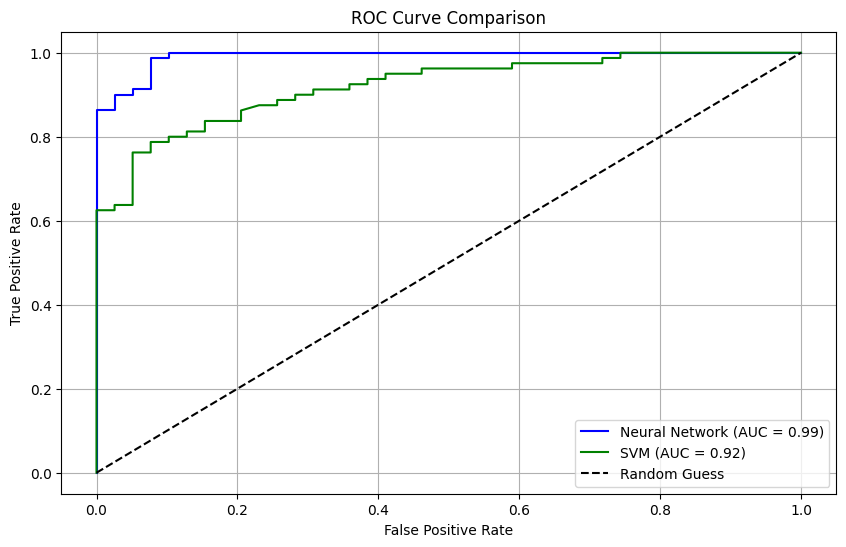

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

# Model 1: Neural Network

y_pred_prob_nn = N_N_model.predict(X_test).flatten()

# Model 2: Polynomial SVM

y_pred_prob_svm = svm_model.predict_proba(X_test)[:, 1]  # Probability for the positive class (1)

# Compute ROC curve and AUC for Neural Network
fpr_nn, tpr_nn, _ = roc_curve(y_test, y_pred_prob_nn)
auc_nn = auc(fpr_nn, tpr_nn)

# Compute ROC curve and AUC for SVM
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_pred_prob_svm)
auc_svm = auc(fpr_svm, tpr_svm)

# Plot ROC curves
plt.figure(figsize=(10, 6))
plt.plot(fpr_nn, tpr_nn, label=f'Neural Network (AUC = {auc_nn:.2f})', color='blue')
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {auc_svm:.2f})', color='green')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')

# Formatting the plot
plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()
